In [1]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset_path = '../../datasets/house-prices-advanced-regression-techniques/'
train_path = dataset_path + 'train.csv'
test_path = dataset_path + 'test.csv'

Text(0.5, 1.0, 'Top 10 correlations with target')

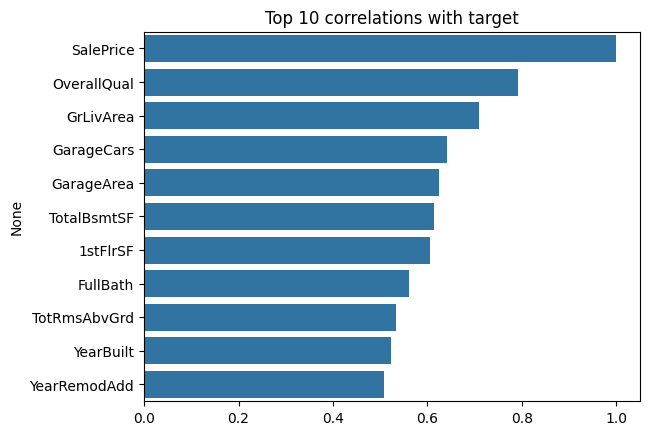

In [92]:
dataset_df = pd.read_csv(train_path)

selected_df = dataset_df.select_dtypes(include=['float64', 'int64'])
target = dataset_df['SalePrice']

top_corr_to_target = selected_df \
    .corr() \
    .iloc[:, -1] \
    .sort_values(ascending=False) \
    .take(range(11))

selected_df = selected_df[top_corr_to_target.index]

sns.barplot(x=top_corr_to_target.values, y=top_corr_to_target.index)
plt.title("Top 10 correlations with target")

Text(0.5, 1.0, 'correlation matrix of top 10 features')

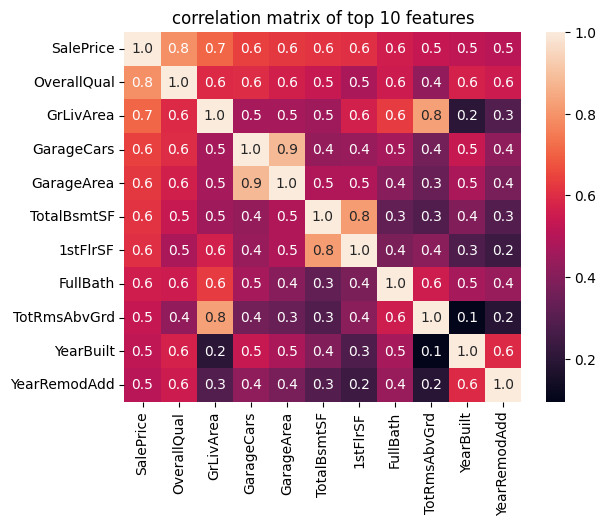

In [93]:
corr = selected_df.corr()
sns.heatmap(corr, annot=True, fmt=".1f")
plt.title("correlation matrix of top 10 features")

Highly correlated features:
- <u>GarageArea</u> & <u>GarageCars</u> (0.9)
- Total rooms above grade (<u>TotRmsAbvGrd</u>) & Above grade (ground) living area square feet (<u>GrLivArea</u>) (0.8)
- First Floor square feet <u>1stFlrSF</u> & Total square feet of basement area <u>TotalBsmtSF</u> (0.8)

Choosing:
- GarageArea over GarageCars
- GrLivArea over TotRmsAbvGrd
- 1stFlrSF over TotalBsmtSF

In [94]:
selected_df = selected_df.drop(['GarageCars','TotRmsAbvGrd', 'TotalBsmtSF'] , axis=1)

Text(0.5, 1.0, 'correlation matrix of top 7 features')

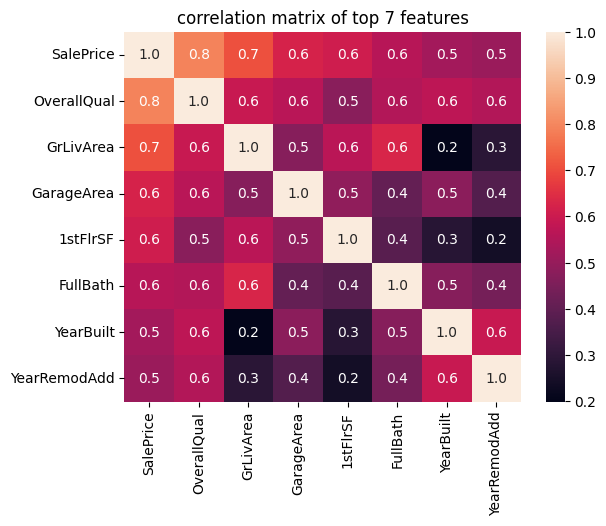

In [95]:
corr = selected_df.corr()
sns.heatmap(corr, annot=True, fmt=".1f")
plt.title("correlation matrix of top 7 features")

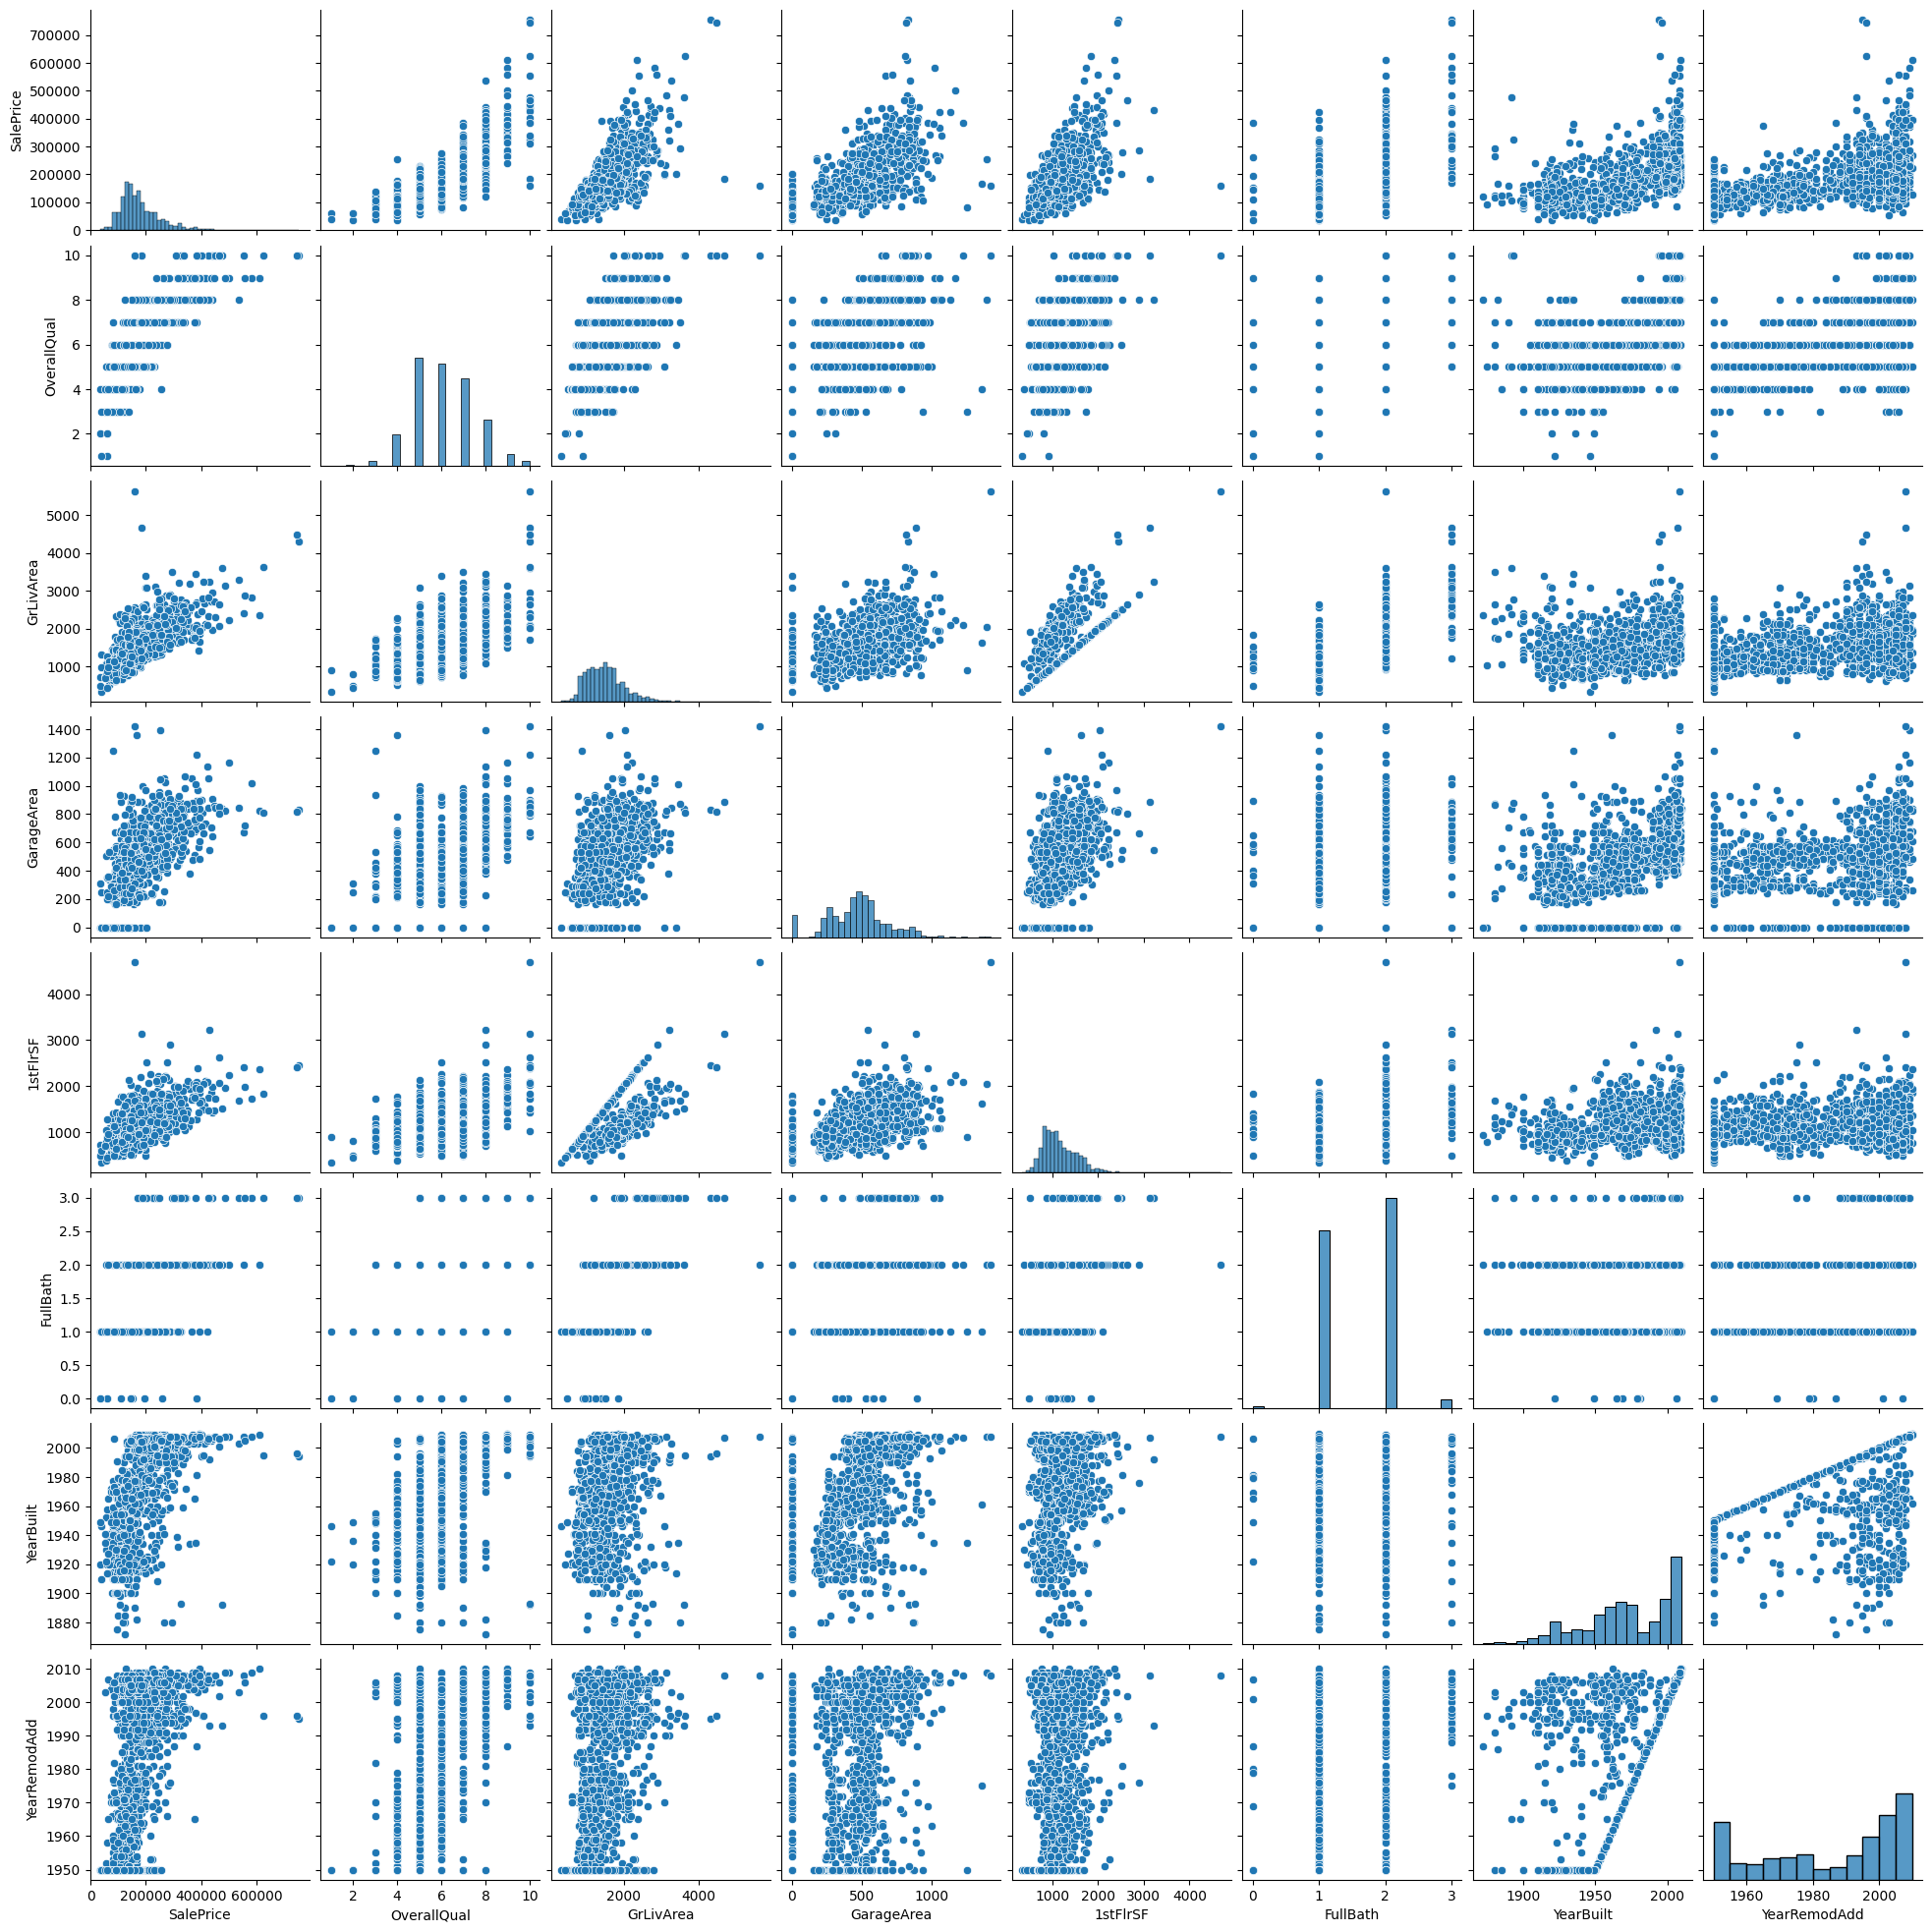

In [97]:
sns.pairplot(selected_df)